In [129]:
# import the proper libraries and load the data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# load the fashion-mnist pre shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# create a dictionary for eacy type of the label
label = {0:"T-shirt/top", 1:"Trouser", 2:"Pull over", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle Boot"}

print ("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


image #48153 is categorized as Sneaker


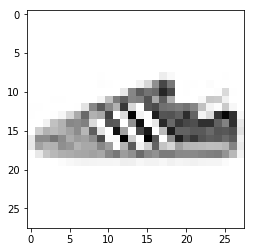

In [130]:
# test the data load with the random index
image_index = random.randint(1,60000)
plt.imshow(x_train[image_index],cmap='Greys')
print("image #%d is categorized as %s" %(image_index, label[y_train[image_index]]))



In [131]:
# reshaping the dataset to 4-dims so it works with Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Data normalization
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0



In [132]:
# import the keras function libraries for brevity
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# create the model, empty neural network
model = Sequential()

# define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

# model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               3211520   
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2570      
Total para

In [133]:
# compile the model
# configure the learning process before training the model. here to define the type of loss function, optimizer and teh metrics evaluated by the model during training and testing
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

# Validation data set to be added!!




Epoch 1/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.4431 - acc: 0.8409
Epoch 2/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.3202 - acc: 0.8836
Epoch 3/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.2826 - acc: 0.8972
Epoch 4/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2638 - acc: 0.9032
Epoch 5/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.2434 - acc: 0.9094
Epoch 6/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2290 - acc: 0.9160
Epoch 7/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2158 - acc: 0.9199
Epoch 8/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2039 - acc: 0.9237
Epoch 9/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.1929 - acc: 0.9276
Epoch 10/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1886 - acc: 0.929

In [135]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 202us/step


[0.2544606058597565, 0.9129]

Prediction for image number 10 is Coat


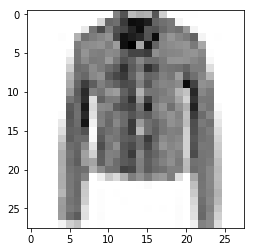

Prediction for image number 20 is Pull over


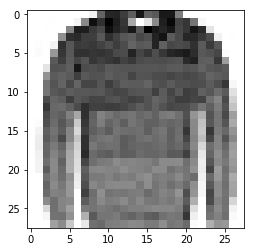

Prediction for image number 30 is Bag


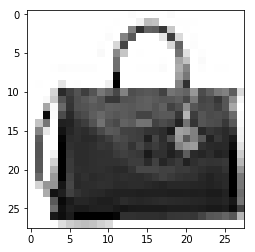

Prediction for image number 40 is T-shirt/top


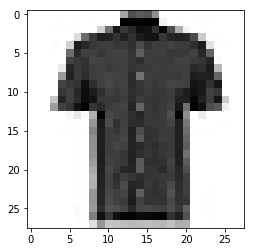

Prediction for image number 50 is Coat


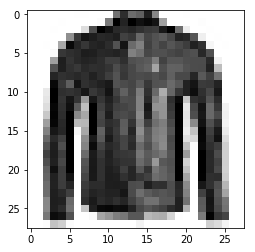

Prediction for image number 60 is Sneaker


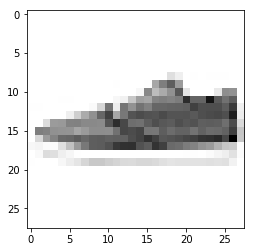

Prediction for image number 70 is Sneaker


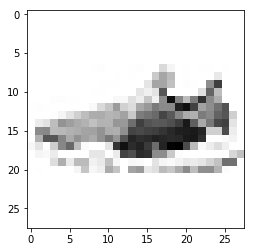

Prediction for image number 80 is Trouser


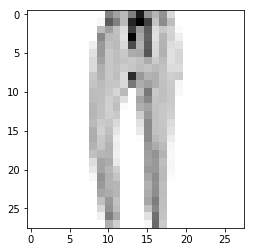

Prediction for image number 90 is Sandal


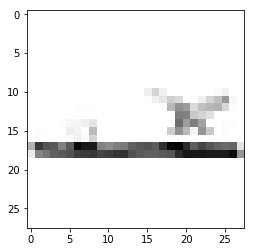

In [137]:
# evaluate ten images in the test set

plt.figure()
for i in range(1,10):
    image_index = 10*i
    plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
    pred = model.predict(x_test[image_index].reshape(1, 28,28,1))
    print("Prediction for image number %d is" %image_index, label[pred.argmax()])
    plt.show() # lets image to show every loop iteration